1.0 46
1.0 10
diff= 0.40869565217391296 0.7956521739130435
KS= KstestResult(statistic=0.1826086956521739, pvalue=0.8980479946215417)


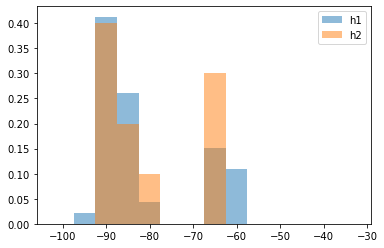

In [146]:
# testing hiostogram comparison 

import cv2, math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, chisquare


# Load the images
img1 =  np.array([-88, -88, -87, -87, -87, -86, -86, -85, -85, -83, -82, -58, 
         -58, -57, -90, -90, -90, -89, -82, -81, -80, -63, -62, -61, 
         -90, -90, -90, -89, -82, -81, -80, -63, -62, -61, -86, -86, 
         -91, -89, -87, -82, -82, -82, -82, -62, -60, -59])
#img1 = np.array([-80, -64])
img2 = np.array([-90, -90, -90, -89, -82, -81, -80, -63, -62, -61])
#img2 = np.array([-61])


bins=np.arange(-100, -29, 5) 
bin_width = abs(bins[1]-bins[0])
hist1,be1 = np.histogram(img1, bins=bins, density=False)
hist2,be2 = np.histogram(img2, bins=bins, density=False)
hist1 = hist1 / img1.size 
hist2 = hist2 / img2.size 

def hist_intersect(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

print(sum(hist1), len(img1))
print(sum(hist2), len(img2))

# find the metric value
print("diff=", sum(abs(hist2-hist1)), hist_intersect(hist1, hist2))
print("KS=", ks_2samp(img1, img2)) # , "CS=", chisquare(img2, f_exp=img1))



plt.bar(bins[:-1], hist1, width=bin_width, alpha=0.5, 
               linewidth=0.3)
plt.bar(bins[:-1], hist2, width=bin_width, alpha=0.5, 
               linewidth=0.3)

plt.legend(["h1", "h2"])
plt.show()

